<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 20</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [1]:
using PyPlot

## Ecuaciones diferenciales parciales

## Ejercicio 1

Se resuelve la ecuación de Laplace de dos dimensiones en una malla de 5 por 7 con las siguientes condiciones a la frontera: la función $\:f$ toma los valores $\{0, 70.7107, 100, 70.7107, 0\}$ en el borde superior y es cero en los demás bordes. Las ecuación matricial a resolver es: $\boldsymbol{\mathcal{A}}\:\boldsymbol{f}+\mathbf{b}=0$, en donde

$$
\boldsymbol{\mathcal{A}}=
\left(
\begin{array}{ccccccccccccccc}
 -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 1 & -4 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
 1 & 0 & 0 & 0 & 0 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\
 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 0 & 0 & 0 & 0 & 1 \\
 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & -4 & 1 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 \\
\end{array}
\right),\:\:
\mathbf{b}=
\left(
\begin{array}{ccccccccccccccc}
 0 \\
 0 \\
 0 \\
 0 \\
 70.7107 \\
 0 \\
 0 \\
 0 \\
 0 \\
 100 \\
 0 \\
 0 \\
 0 \\
 0 \\
 70.7107 \\
\end{array}
\right)\:\:
\mathrm{y}\:\:
\boldsymbol{f}=
\left(
\begin{array}{ccccccccccccccc}
 f_{2,2} \\
 f_{2,3} \\
 f_{2,4} \\
 f_{2,5} \\
 f_{2,6} \\
 f_{3,2} \\
 f_{3,3} \\
 f_{3,4} \\
 f_{3,5} \\
 f_{3,6} \\
 f_{4,2} \\
 f_{4,3} \\
 f_{4,4} \\
 f_{4,5} \\
 f_{4,6} \\
\end{array}
\right)
$$

In [2]:
A = zeros(15,15)

for i in 1:15
    A[i,i] = -4
    if i < 15 && i != 5 && i != 10
        A[i,i+1] = 1
        A[i+1,i] = 1
    end
    if i < 11
        A[i,i+5] = 1
        A[i+5,i] = 1
    end
end

In [3]:
A

15×15 Array{Float64,2}:
 -4.0   1.0   0.0   0.0   0.0   1.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -4.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -4.0   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -4.0   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -4.0   0.0      1.0   0.0   0.0   0.0   0.0   0.0
  1.0   0.0   0.0   0.0   0.0  -4.0  …   0.0   1.0   0.0   0.0   0.0   0.0
  0.0   1.0   0.0   0.0   0.0   1.0      0.0   0.0   1.0   0.0   0.0   0.0
  0.0   0.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   1.0   0.0   0.0
  0.0   0.0   0.0   1.0   0.0   0.0      1.0   0.0   0.0   0.0   1.0   0.0
  0.0   0.0   0.0   0.0   1.0   0.0     -4.0   0.0   0.0   0.0   0.0   1.0
  0.0   0.0   0.0   0.0   0.0   1.0  …   0.0  -4.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   1.0  -4.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   1.0  -4.0   1.0   0.0
 

In [4]:
b = [0 0 0 0 70.7107 0 0 0 0 100 0 0 0 0 70.7107]'
f = -inv(A)*b;
F = reshape(f,(5,3))

5×3 Array{Float64,2}:
  1.30459   1.84497   1.30459
  3.37339   4.77069   3.37339
  7.41827  10.491     7.41827
 15.8087   22.3568   15.8087 
 33.4596   47.319    33.4596 

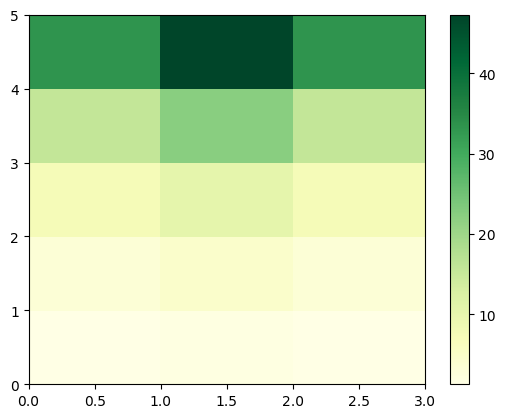

In [5]:
pcolormesh(F,cmap="YlGn")
colorbar();

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>